##### Explore educationa and GDP

In [2]:
# Libraries to work with dataframe
import json
import pandas as pd
import numpy as np
# Libraries for datetime
import datetime as dt
# Libraries for EDA
from matplotlib import pyplot as plt
import seaborn as sns
# Libraries for ML
from sklearn import linear_model, datasets

In [3]:
df_population=pd.read_csv(r"/Users/tinapham/Desktop/lighthouse-data-notes/ProJect/LHL_Midterm_Project/Data/clean_data/df_population.csv", sep=',')

df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 92 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Time                                                        986 non-null    object 
 1   Time Code                                                   986 non-null    object 
 2   Country Name                                                986 non-null    object 
 3   Country Code                                                986 non-null    object 
 4   CPIA economic management cluster average                    986 non-null    float64
 5   CPIA financial sector rating                                986 non-null    float64
 6   CPIA macroeconomic management rating                        986 non-null    float64
 7   Automated teller machines                                   986 non-null    float64
 8   

In [61]:
df_population.columns = df_population.columns.str.replace(" ", '_')
df_population.columns = df_population.columns.str.replace(',', '')

In [59]:
#df_female=pd.read_csv(r"/Users/tinapham/Desktop/lighthouse-data-notes/ProJect/LHL_Midterm_Project/Data/clean_data/df_female.csv", sep=',')

#df_female.info()

In [60]:
#df_male=pd.read_csv(r"/Users/tinapham/Desktop/lighthouse-data-notes/ProJect/LHL_Midterm_Project/Data/clean_data/df_male.csv", sep=',')

#df_male.info()

### Create a stats model to learn about economic variable that effect unemployment
- Dependent is uneployement
- Economic variable:
    - GDP Growth [64]
    - Labor force total [22]
    - Agriculture value added %GDP [60]
    - Inflation consumer prices [74]
    - Manufacturing value added %GDP [75]
    - Export value index [79]
    - Exports of goods and services %GDP[81]

In [62]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 92 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Time                                                        986 non-null    object 
 1   Time_Code                                                   986 non-null    object 
 2   Country_Name                                                986 non-null    object 
 3   Country_Code                                                986 non-null    object 
 4   CPIA_economic_management_cluster_average_                   986 non-null    float64
 5   CPIA_financial_sector_rating_                               986 non-null    float64
 6   CPIA_macroeconomic_management_rating_                       986 non-null    float64
 7   Automated_teller_machines_                                  986 non-null    float64
 8   

In [ ]:
df

Text(0.5, 1.0, '[Seaborn] Box-Plot of unemployment')

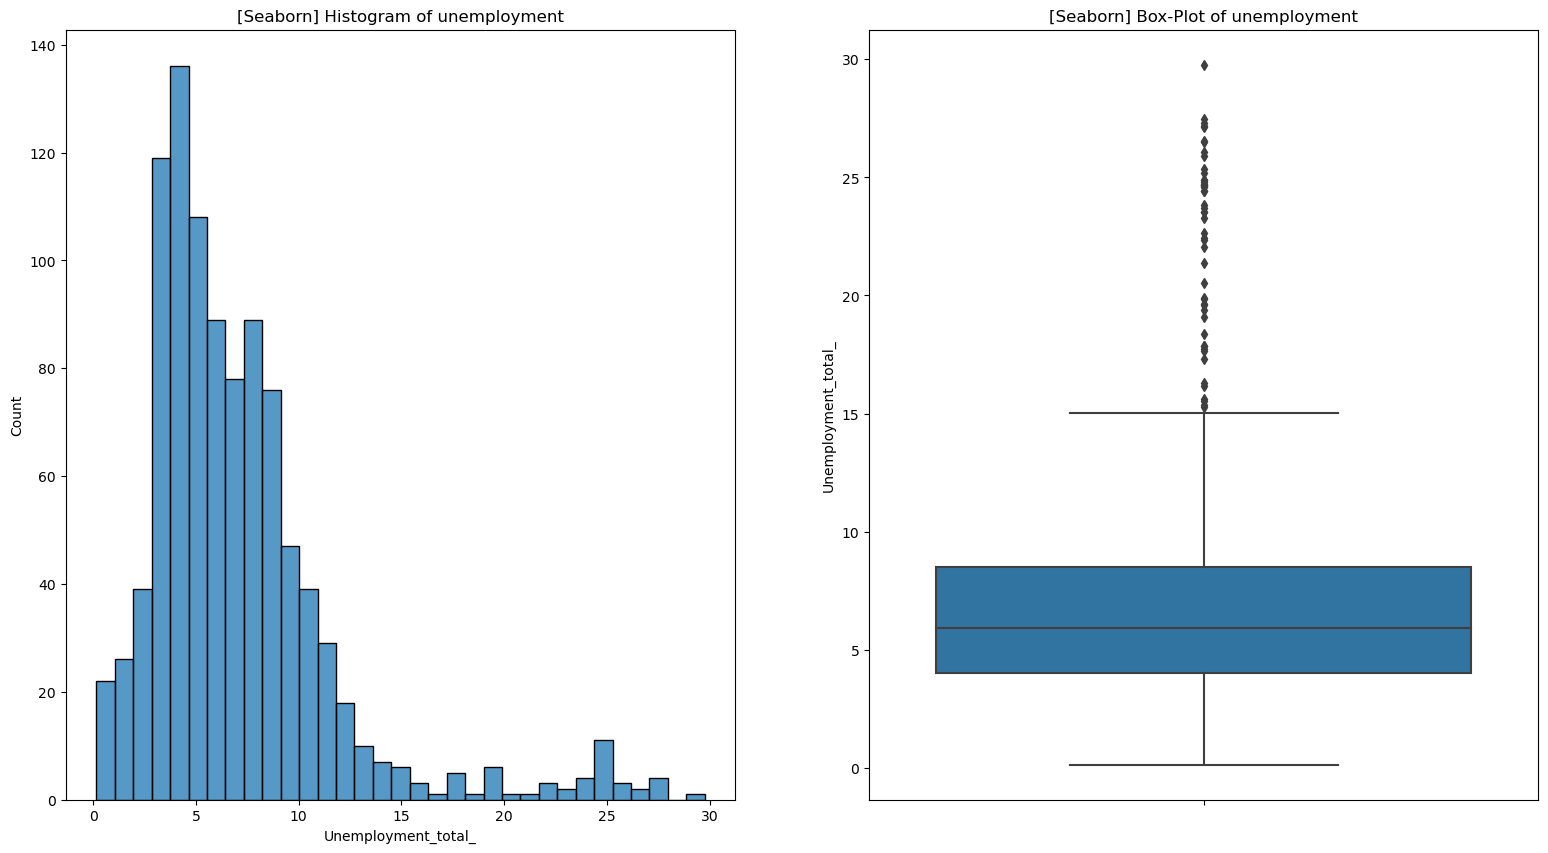

In [6]:
# Distribution  of unemployement percentage showing it has a near normal distribution.

fig, axes = plt.subplots(1, 2, figsize=(19, 10))
index=df_population.iloc[:,26]

#seaborn
sns.histplot(ax=axes[0], 
                data=df_population, 
                x='Unemployment_total_')
axes[0].set_title('[Seaborn] Histogram of unemployment')

sns.boxplot(ax=axes[1],
            data=df_population,
            y='Unemployment_total_')
axes[1].set_title('[Seaborn] Box-Plot of unemployment')



- Unemployment are right skew due to some countries within the population having a high number of unemployment while some other country doesn not record their unemployment rate at all. Need to go back and recheck raw data for the number of null value to remove outlier. For now, keeping the data as is cause it somewhat makes sense.

In [82]:
# Create a smaller dataframe of the dependence and indepence variables to build the stat model of unemployment analysis
indices= [0,2,26,22,60,74,75,79,80,81]
stat_df= df_population[df_population.columns[indices]]

In [83]:
stat_df.describe()

,Unemployment_total_,Labor_force_total_,Agriculture_value_added_%GDP_,Inflation_consumer_prices_,Manufacturing_value_added_%GDP_,Export_value_index_,Export_volume_index_,Exports_of_goods_and_services_%GDP_
count,986.000000,9.860000e+02,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,6.987200,4.519488e+07,6.371985,4.432810,14.868610,254.178875,153.573609,44.801381
std,4.608978,1.157532e+08,7.860397,6.050695,6.844998,176.159462,79.757730,35.505397
min,0.140000,3.388610e+05,0.000000,-10.067493,0.000000,47.649657,19.050887,0.000000
25%,4.022500,4.819034e+06,1.383774,1.417164,11.078661,132.359712,105.029958,24.655692
50%,5.915000,1.665011e+07,3.073483,2.821709,14.841502,202.828958,128.544632,34.960360
75%,8.500500,3.797696e+07,8.717630,5.536197,18.652351,300.498602,170.060996,53.861337
max,29.770000,7.870732e+08,47.095501,54.915382,36.763018,1220.635564,683.749635,231.194490


- Need more inspection on variables where data minimum is 0, this could be due to a mistake of datacleaning from the raw data by filling in null with 0 to convert data to float.

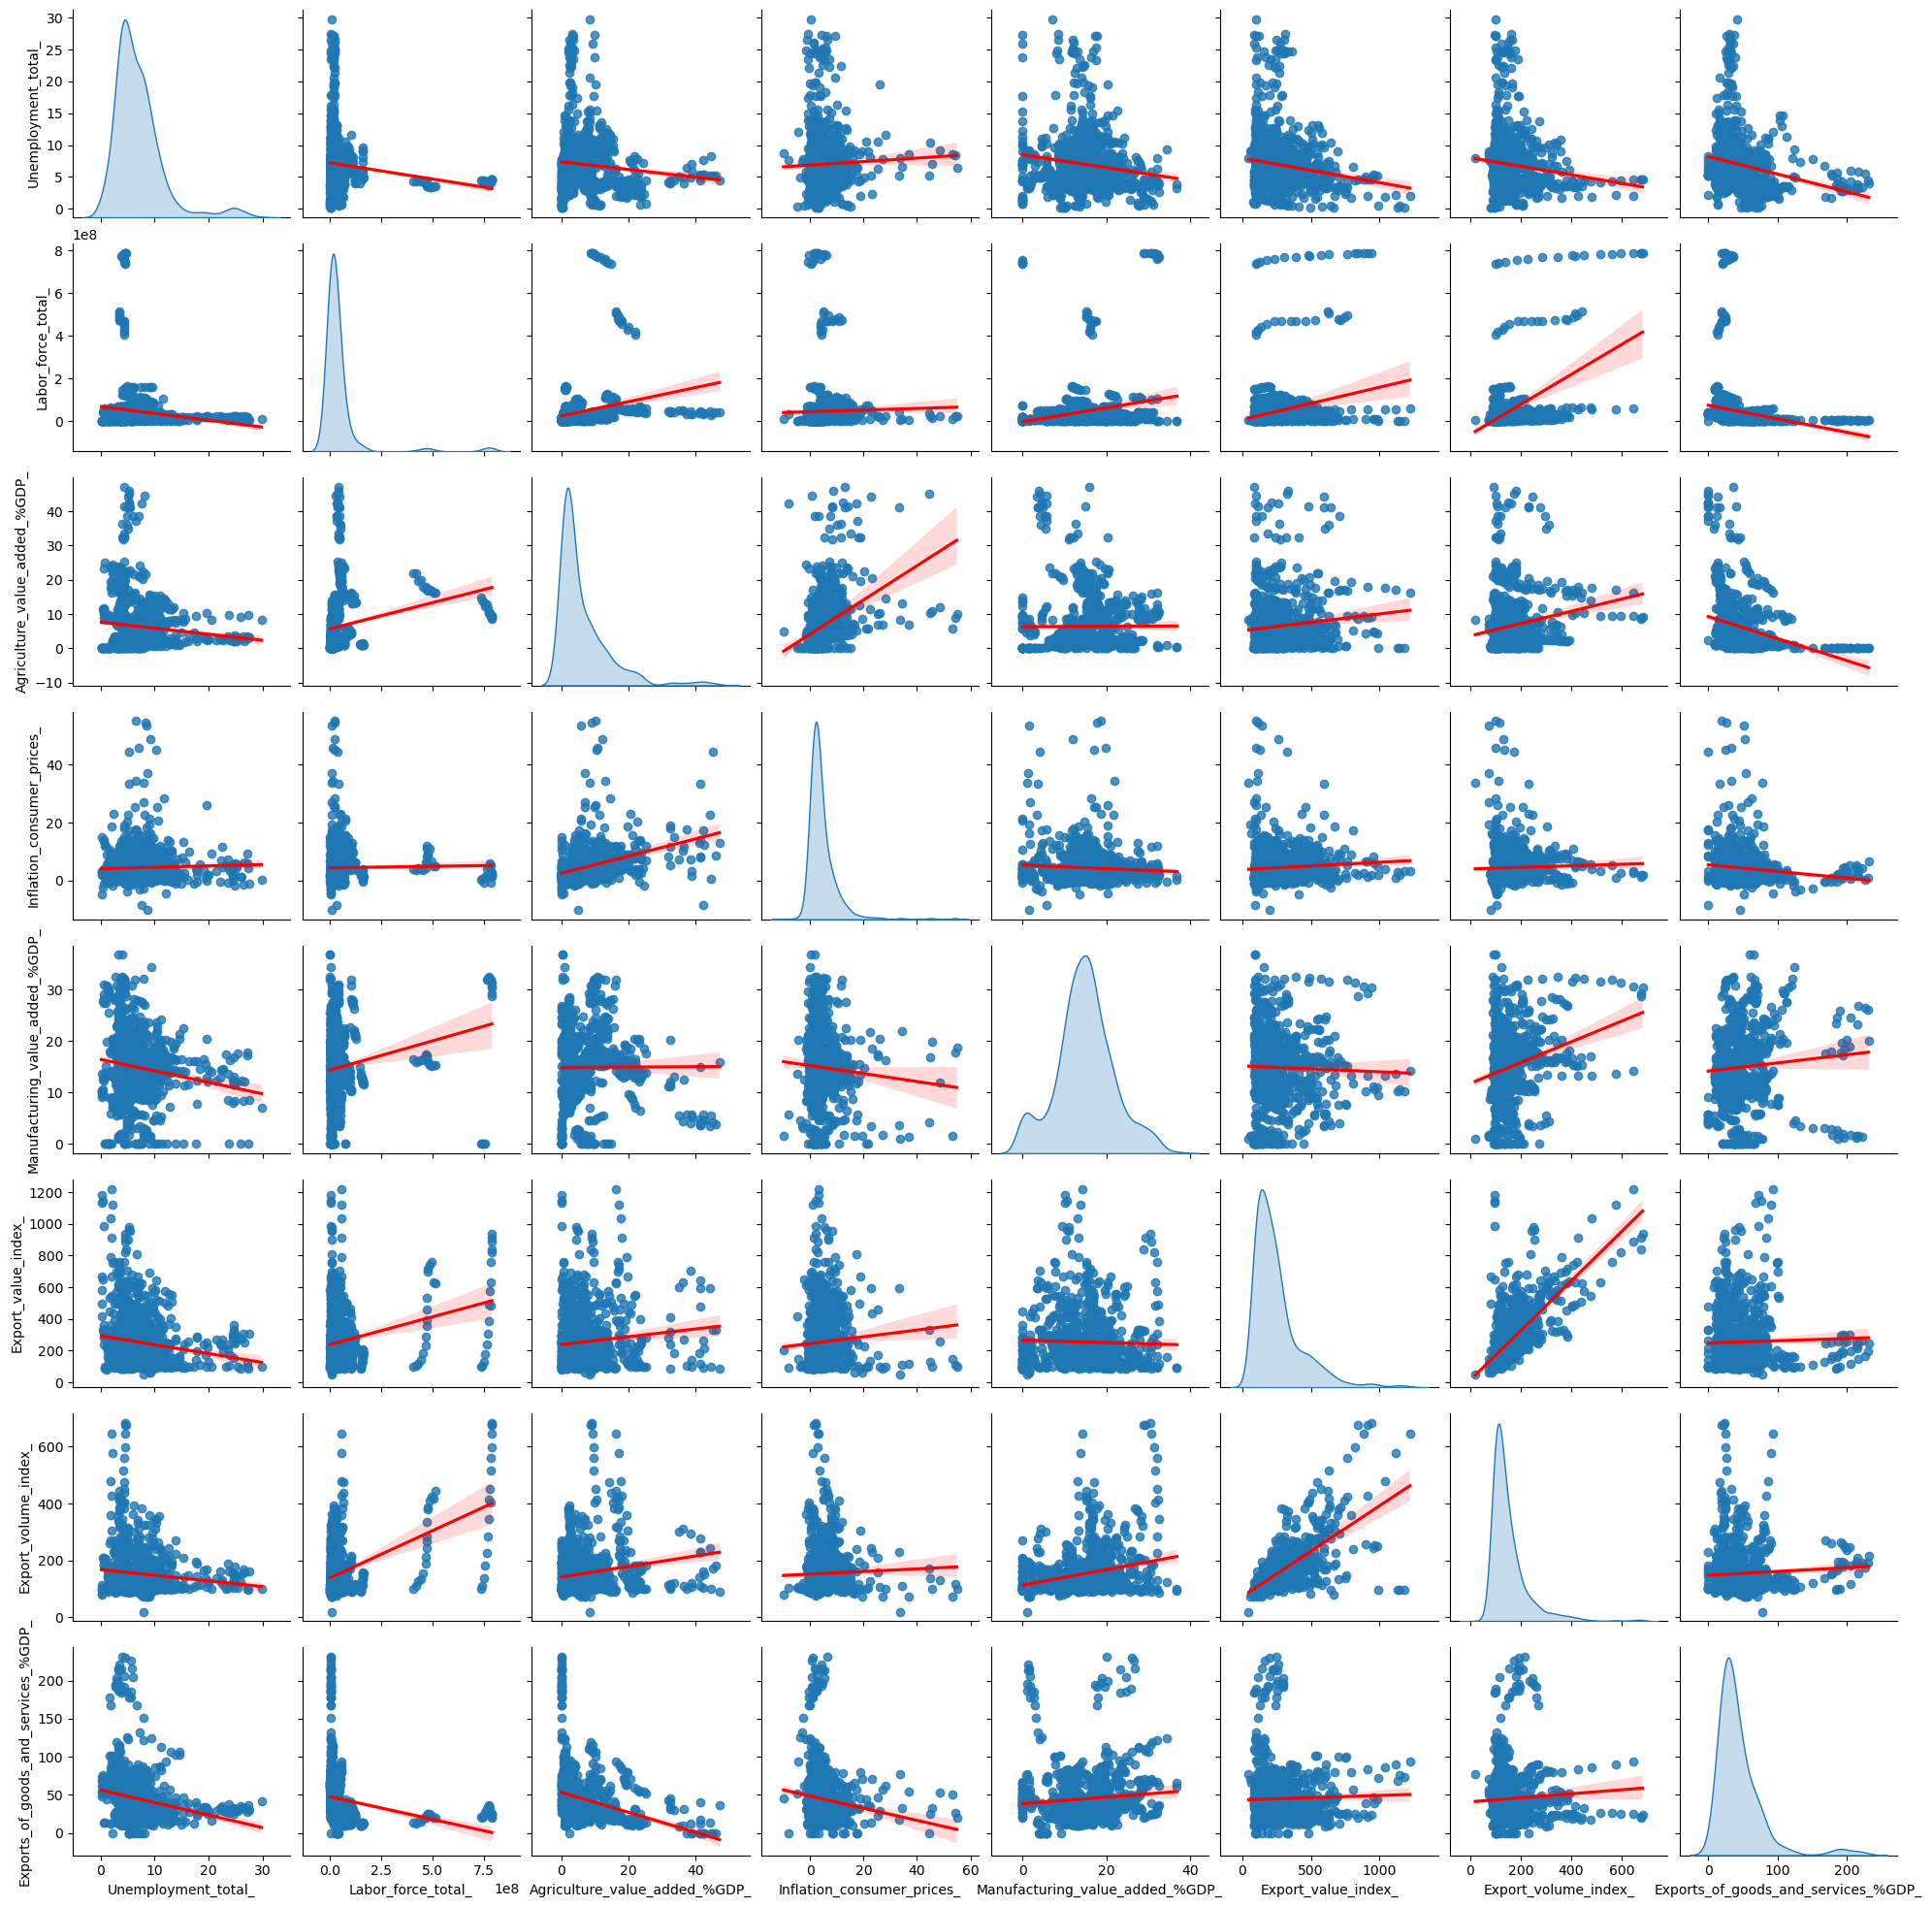

In [84]:
fig_1=sns.pairplot(data=stat_df,
                    kind='reg', 
                    diag_kind='kde',
                    plot_kws={'line_kws':{'color':'red'}})


#### Pairplot finding
- Manufacturing show a close to normal distribution. The ditribution for the rest of the variables are right skew with outlier present in the scatter plot that could affect the stat model, further analysis of the variables need to be done before decide to drop the outlier.
- Due to time constraint, create a base model before expand to cleaning the outlier.

/var/folders/4c/r7kxsc7j67gd7wlqt50rmb100000gn/T/ipykernel_28801/2851552997.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= stat_df.corr()


<AxesSubplot:>

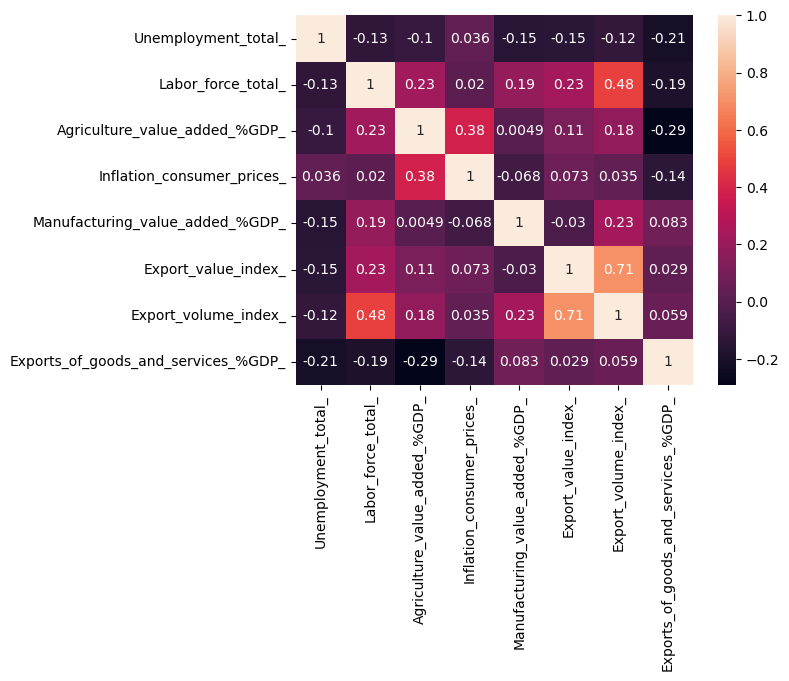

In [85]:
# correllation of stat_df
corr= stat_df.corr()
# Create a heat map with correlation data
sns.heatmap(data= corr, annot=True)

In [71]:
corr

,Labor_force_total_,Agriculture_value_added_%GDP_,Inflation_consumer_prices_,Manufacturing_value_added_%GDP_,Export_value_index_,Export_volume_index_,Exports_of_goods_and_services_%GDP_
Labor_force_total_,1.000000,0.225474,0.020178,0.192978,0.230509,0.482846,-0.194661
Agriculture_value_added_%GDP_,0.225474,1.000000,0.383798,0.004886,0.109296,0.181488,-0.291085
Inflation_consumer_prices_,0.020178,0.383798,1.000000,-0.068184,0.072930,0.035117,-0.136003
Manufacturing_value_added_%GDP_,0.192978,0.004886,-0.068184,1.000000,-0.029571,0.234923,0.082688
Export_value_index_,0.230509,0.109296,0.072930,-0.029571,1.000000,0.706175,0.028852
Export_volume_index_,0.482846,0.181488,0.035117,0.234923,0.706175,1.000000,0.059223
Exports_of_goods_and_services_%GDP_,-0.194661,-0.291085,-0.136003,0.082688,0.028852,0.059223,1.000000


### EDA Explanation
- Low corellation due to present of outlier that might effect the stat model. 
-The outlier could be due to different type of economy in different country around the world such us country like Bangladesh that is a traditional (developing market economy) economy where emerging market with fast growing economy and country like US is a mixed market economy where the economy depend on supply and demand. 
- This create a disrepancy on the employment market for these country. 


#### Detect outlier and problem for the model
- Need more assessment whether data create any meaning to the population or it is just a random variation


In [86]:
# To clean outlier after assessment 
# stat_df = stat_df.drop(stat_df[(stat_df['Manufacturing_value_added_%GDP_']==0)].index)

## Stats Model Training

### Regression model
- Predicting unemployment base on export value base on:
    - GDP Growth [64]
    - Labor force total [22]
    - Agriculture value added %GDP [60]
    - Inflation consumer prices [74]
    - Manufacturing value added %GDP [75]
    - Export value index [79]
    - Exports of goods and services %GDP[81]

In [87]:
stat_df.columns

Index(['Time', 'Country_Name', 'Unemployment_total_', 'Labor_force_total_',
       'Agriculture_value_added_%GDP_', 'Inflation_consumer_prices_',
       'Manufacturing_value_added_%GDP_', 'Export_value_index_',
       'Export_volume_index_', 'Exports_of_goods_and_services_%GDP_'],
      dtype='object')

In [88]:
import statsmodels.api as sm
y = stat_df[['Unemployment_total_']]
X = stat_df[['Labor_force_total_',
              'Agriculture_value_added_%GDP_',
              'Inflation_consumer_prices_',
              'Manufacturing_value_added_%GDP_',
              'Export_value_index_',
              'Export_volume_index_',
              'Exports_of_goods_and_services_%GDP_']]

X= sm.add_constant(X)
X.head()

,const,Labor_force_total_,Agriculture_value_added_%GDP_,Inflation_consumer_prices_,Manufacturing_value_added_%GDP_,Export_value_index_,Export_volume_index_,Exports_of_goods_and_services_%GDP_
0,1.0,11937169.0,12.295780,6.397714,5.605361,131.099918,144.936023,21.001758
1,1.0,19704082.0,6.353904,0.000000,13.600943,219.174671,124.366098,12.583832
2,1.0,12741985.0,2.430580,1.276991,6.067472,299.281044,165.145612,19.253027
3,1.0,4535197.0,1.101589,0.891591,16.206977,225.350392,149.861878,52.261834
4,1.0,5004722.0,0.617492,1.972250,12.742265,211.795574,144.730077,82.937776


In [89]:
model = sm.OLS(y, X) 
results = model.fit() 
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Unemployment_total_   R-squared:                       0.137
Model:                             OLS   Adj. R-squared:                  0.131
Method:                  Least Squares   F-statistic:                     22.20
Date:                 Fri, 14 Jul 2023   Prob (F-statistic):           5.57e-28
Time:                         19:19:12   Log-Likelihood:                -2832.5
No. Observations:                  986   AIC:                             5681.
Df Residuals:                      978   BIC:                             5720.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [28]:
# different between observed and predicted value
residuals = results.resid
residuals

0       0.755211
1       0.055346
2      -2.523453
3      -1.477755
4       0.416591
         ...    
981     0.240068
982    -5.057281
983    -2.653327
984    14.508449
985     1.011959
Length: 986, dtype: float64

Text(0.5, 1.0, 'Histogram of Residuals of Linear Regression')

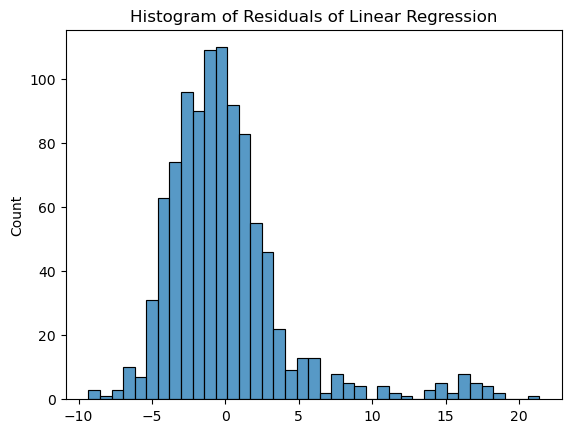

In [91]:
fig_2=sns.histplot(residuals)
fig_2.set_title('Histogram of Residuals of Linear Regression')


In [30]:
# Shapiro test on the distribution of the residual
import scipy
scipy.stats.shapiro(residuals) 

ShapiroResult(statistic=0.8383829593658447, pvalue=1.7943460471516696e-30)

p-value<0.05> for Shapiro Wilk test --> reject Null Hypothesis, the residual is not normally distributed.

In [31]:
from sklearn.model_selection import train_test_split
# test 40% of population with 101 random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [100]:
from sklearn import linear_model, datasets
lm= LinearRegression()
# fit the linear regression of the train model
lm.fit(X_train,y_train)
# create the prediction with the test model
predictions=lm.predict(X_test)

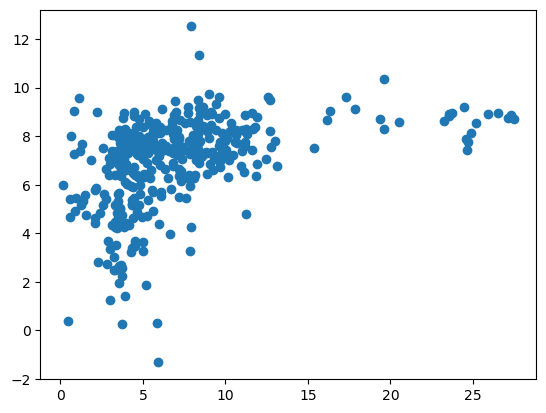

In [101]:
# Overlap of the train model and  predictions
plt.scatter(y_test,predictions)


- Residual are off and displaying outlier in the base stat model.
- Outlier need to be identified and remove to form the more accurate prediction model

/var/folders/4c/r7kxsc7j67gd7wlqt50rmb100000gn/T/ipykernel_28801/2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<AxesSubplot:ylabel='Density'>

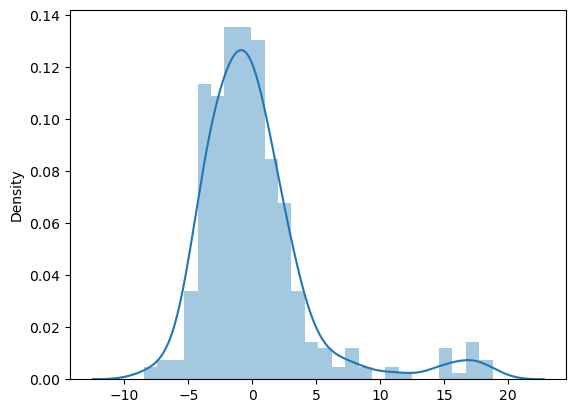

In [98]:
sns.distplot(y_test-predictions)

- Histogram of the residuals show that data is not normally distributed.
- Need to go back and revised the linear regression model --> possibly refined the analysis to targeted country. 
- Large variation in population can cause inaccuracy in model. 